# 🧠 LitKG SDK - Interactive Knowledge Graph Construction

This notebook demonstrates how to use LitKG SDK to convert PDF literature into interactive knowledge graphs with human-in-the-loop validation.

## Features Demonstrated
- 📄 PDF upload and processing
- 🤖 LLM-powered entity and relation extraction
- ✅ Interactive human validation
- 📊 Knowledge graph visualization
- 🏘️ Community detection
- ⏰ Temporal analysis
- 💾 Multiple export formats

## 🚀 Setup and Installation

First, install LitKG SDK with all dependencies:

In [25]:
# Install LitKG SDK (run once)
! pip install lit-kg-sdk[all]

zsh:1: no matches found: lit-kg-sdk[all]


In [1]:
# Import required libraries
import litkg
import os
from pathlib import Path

# Set up API keys (you can also use environment variables)
# os.environ['OPENAI_API_KEY'] = 'your_openai_key_here'
# os.environ['ANTHROPIC_API_KEY'] = 'your_anthropic_key_here'

print("✅ LitKG SDK imported successfully!")
print(f"📦 Version: {litkg.__version__}")

✅ LitKG SDK imported successfully!
📦 Version: 0.1.0


## 1️⃣ Create Session with LLM

Choose your preferred LLM provider and model:

In [ ]:
try:
    from dotenv import load_dotenv
    load_dotenv()
    print("✅ Environment variables loaded")
except ImportError:
    print("⚠️ python-dotenv not installed. Make sure to set API keys manually.")
    print("   Install with: pip install python-dotenv")
# Create session with GPT-4 (recommended)
session = litkg.create_session(
    llm="gpt-4",                    # or "claude-3.5-sonnet", "ollama/llama3.1"
    confidence_threshold=0.7,       # Minimum confidence for extractions
    enable_communities=True,        # Enable community detection
    enable_temporal=True,           # Enable temporal tracking
    domain="general"                # or "biomedical", "computer_science", etc.
)

print("🧠 Session created with advanced LLM capabilities!")
print(f"📊 Configuration: {session.config.llm_provider} - {session.config.llm_model}")

🧠 Session created with advanced LLM capabilities!
📊 Configuration: openai - gpt-4


## 2️⃣ Upload and Process PDF

Upload your research papers and automatically extract knowledge:

In [3]:
# Single PDF processing
# kg = session.upload_pdf(
#     "your_research_paper.pdf",
#     preserve_structure=True,      # Maintain document hierarchy
#     chunking_strategy="semantic"  # Intelligent text chunking
# )

# For demo purposes, let's create a sample knowledge graph
kg = litkg.KnowledgeGraph(session)

# Add sample entities
from litkg.core.knowledge_graph import Entity, Relation

# Sample research entities
entities = [
    Entity("llm_1", "Large Language Models", "Concept", 
           {"field": "AI", "year": 2023}, 0.95, "demo_paper.pdf"),
    Entity("gpt4_1", "GPT-4", "Model", 
           {"company": "OpenAI", "parameters": "1.76T"}, 0.98, "demo_paper.pdf"),
    Entity("kg_1", "Knowledge Graphs", "Concept", 
           {"field": "AI", "application": "information_extraction"}, 0.92, "demo_paper.pdf"),
    Entity("rag_1", "Retrieval Augmented Generation", "Method", 
           {"year": 2020, "improves": "factual_accuracy"}, 0.89, "demo_paper.pdf"),
    Entity("neo4j_1", "Neo4j", "Tool", 
           {"type": "graph_database", "query_language": "Cypher"}, 0.94, "demo_paper.pdf")
]

for entity in entities:
    kg.add_entity(entity)

# Sample relations
relations = [
    Relation("rel_1", "gpt4_1", "llm_1", "InstanceOf", 
             {"specificity": "high"}, 0.96, "demo_paper.pdf"),
    Relation("rel_2", "llm_1", "kg_1", "UsedFor", 
             {"purpose": "knowledge_extraction"}, 0.87, "demo_paper.pdf"),
    Relation("rel_3", "rag_1", "llm_1", "EnhancementOf", 
             {"improvement": "factual_accuracy"}, 0.91, "demo_paper.pdf"),
    Relation("rel_4", "kg_1", "neo4j_1", "StoredIn", 
             {"format": "property_graph"}, 0.93, "demo_paper.pdf")
]

for relation in relations:
    kg.add_relation(relation)

print(f"📄 Knowledge graph created!")
print(f"   📊 Entities: {len(kg.entities)}")
print(f"   🔗 Relations: {len(kg.relations)}")
print(f"   📈 Avg Confidence: {sum(e.confidence for e in kg.entities.values()) / len(kg.entities):.2f}")

📄 Knowledge graph created!
   📊 Entities: 5
   🔗 Relations: 4
   📈 Avg Confidence: 0.94


## 3️⃣ Interactive Human Validation

Launch the interactive interface for human-in-the-loop validation:

In [4]:
# Launch interactive validation interface
kg.collaborate_interactively()

## 4️⃣ Knowledge Graph Analysis

Analyze the constructed knowledge graph:

In [6]:
# Entity type distribution
entity_types = {}
for entity in kg.entities.values():
    entity_types[entity.type] = entity_types.get(entity.type, 0) + 1

print("📊 Entity Type Distribution:")
for etype, count in sorted(entity_types.items()):
    print(f"   {etype}: {count}")

# Relation type distribution
relation_types = {}
for relation in kg.relations.values():
    relation_types[relation.type] = relation_types.get(relation.type, 0) + 1

print("\n🔗 Relation Type Distribution:")
for rtype, count in sorted(relation_types.items()):
    print(f"   {rtype}: {count}")

# Confidence statistics
confidences = [e.confidence for e in kg.entities.values()] + [r.confidence for r in kg.relations.values()]
print(f"\n📈 Confidence Statistics:")
print(f"   Mean: {sum(confidences) / len(confidences):.3f}")
print(f"   Min: {min(confidences):.3f}")
print(f"   Max: {max(confidences):.3f}")

📊 Entity Type Distribution:
   Concept: 2
   Method: 1
   Model: 1
   Tool: 1

🔗 Relation Type Distribution:
   EnhancementOf: 1
   InstanceOf: 1
   StoredIn: 1
   UsedFor: 1

📈 Confidence Statistics:
   Mean: 0.928
   Min: 0.870
   Max: 0.980


## 5️⃣ Community Detection

Discover communities and clusters in your knowledge graph:

In [7]:
# Analyze communities
communities = kg.analyze_communities()

print("🏘️ Community Analysis:")
print(f"   Number of communities: {communities.get('num_communities', 0)}")
if 'modularity' in communities and communities['modularity']:
    print(f"   Modularity score: {communities['modularity']:.3f}")

# Show community membership
if 'communities' in communities:
    for comm_id, members in communities['communities'].items():
        print(f"\n   Community {comm_id}:")
        for member in members[:5]:  # Show first 5 members
            if member in kg.entities:
                print(f"     • {kg.entities[member].label}")
        if len(members) > 5:
            print(f"     ... and {len(members) - 5} more")

🏘️ Community Analysis:
   Number of communities: 2
   Modularity score: 0.219

   Community 1:
     • Large Language Models
     • GPT-4
     • Retrieval Augmented Generation

   Community 0:
     • Knowledge Graphs
     • Neo4j


## 6️⃣ Temporal Knowledge Evolution

Track how knowledge evolves over time:

In [8]:
# Track knowledge evolution
evolution = kg.track_knowledge_evolution()

print("⏰ Knowledge Evolution Analysis:")
for source, data in evolution.items():
    if isinstance(data, dict) and 'entities' in data:
        print(f"   {source}: {data['entities']} entities")
        if 'types' in data:
            print(f"     Types: {', '.join(data['types'])}")

# For temporal graphs, you could also use:
# temporal_kg = session.temporal_tracker
# timeline = await temporal_kg.get_knowledge_timeline()
print("\n📈 Timeline analysis available with temporal features enabled")

⏰ Knowledge Evolution Analysis:
   demo_paper.pdf: 5 entities
     Types: Concept, Tool, Method, Model

📈 Timeline analysis available with temporal features enabled


## 7️⃣ Graph Visualization

Visualize your knowledge graph:

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

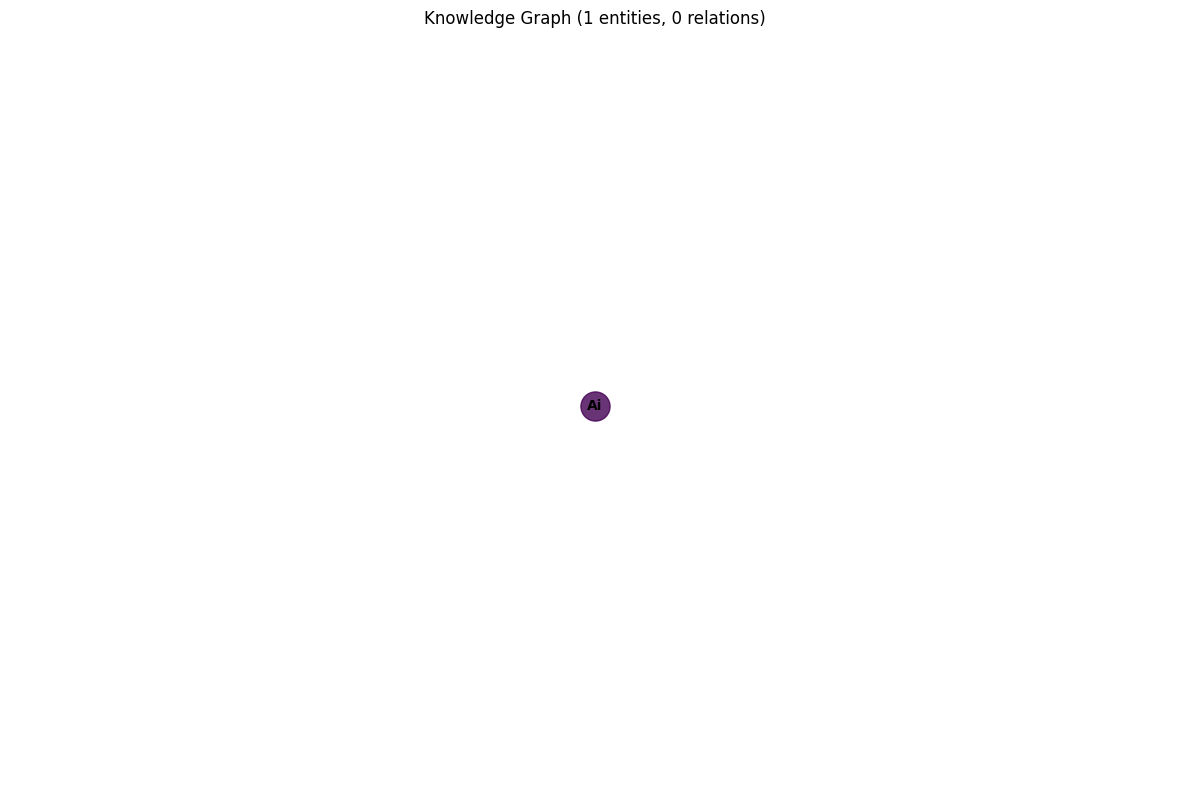

In [5]:
# Visualize the knowledge graph
try:
    kg.visualize(layout='spring', figsize=(12, 8))
except ImportError:
    print("📊 Visualization requires matplotlib. Install with: pip install matplotlib")
    print("\n🔍 Graph Structure:")
    for entity_id, entity in kg.entities.items():
        print(f"   📍 {entity.label} ({entity.type})")
        # Find relations
        for relation in kg.relations.values():
            if relation.source_id == entity_id:
                target = kg.entities.get(relation.target_id)
                if target:
                    print(f"     └─ {relation.type} → {target.label}")

## 8️⃣ Export Knowledge Graph

Export your knowledge graph in various formats:

In [19]:
# Export in multiple formats
export_formats = {
    "JSON": "knowledge_graph.json",
    "Neo4j": "knowledge_graph.cypher",
    "GraphML": "knowledge_graph.graphml",
    "CSV": "knowledge_graph.csv"
}

print("💾 Exporting knowledge graph:")
for format_name, filename in export_formats.items():
    try:
        kg.export(filename)
        print(f"   ✅ {format_name}: {filename}")
    except Exception as e:
        print(f"   ❌ {format_name}: {e}")

print("\n📁 Files created in current directory")

💾 Exporting knowledge graph:
   ✅ JSON: knowledge_graph.json
   ✅ Neo4j: knowledge_graph.cypher
   ✅ GraphML: knowledge_graph.graphml
   ✅ CSV: knowledge_graph.csv

📁 Files created in current directory


## 9️⃣ Advanced Features

Explore advanced LitKG features:

In [21]:
# Batch processing multiple papers
print("📚 Batch Processing Example:")
papers = ["paper1.pdf", "paper2.pdf", "paper3.pdf"]
print(f"   Would process: {', '.join(papers)}")
# merged_kg = session.batch_process(papers)

# Custom entity and relation types
print("\n🎯 Custom Types Example:")
session.config.custom_entities = ["Algorithm", "Dataset", "Metric", "Framework"]
session.config.custom_relations = ["EvaluatedOn", "ImplementedIn", "ImprovedBy"]
print(f"   Custom entities: {session.config.custom_entities}")
print(f"   Custom relations: {session.config.custom_relations}")

# Filter by confidence
print("\n📊 Confidence Filtering:")
high_conf_kg = kg.filter_by_confidence(0.9)
print(f"   Original: {len(kg.entities)} entities, {len(kg.relations)} relations")
print(f"   High confidence (>0.9): {len(high_conf_kg.entities)} entities, {len(high_conf_kg.relations)} relations")

# Session statistics
print("\n📈 Session Statistics:")
stats = session.get_stats()
print(f"   Files processed: {stats.get('total_files_processed', 0)}")
if stats.get('active_kg_stats'):
    kg_stats = stats['active_kg_stats']
    print(f"   Active KG: {kg_stats['entities']} entities, {kg_stats['relations']} relations")

📚 Batch Processing Example:
   Would process: paper1.pdf, paper2.pdf, paper3.pdf

🎯 Custom Types Example:
   Custom entities: ['Algorithm', 'Dataset', 'Metric', 'Framework']
   Custom relations: ['EvaluatedOn', 'ImplementedIn', 'ImprovedBy']

📊 Confidence Filtering:
   Original: 5 entities, 4 relations
   High confidence (>0.9): 4 entities, 2 relations

📈 Session Statistics:
   Files processed: 0


## 🔟 Local LLM Example

Use local models with Ollama for privacy-conscious processing:

In [20]:
# Example with local Ollama model
print("🏠 Local LLM Example:")
try:
    local_session = litkg.create_session(
        llm="ollama/llama3.1",      # Local Llama model
        confidence_threshold=0.7,
        local_processing=True       # All processing stays local
    )
    print("   ✅ Local session created with Llama 3.1")
    print("   🔒 All data processing stays on your machine")
except Exception as e:
    print(f"   ⚠️ Local model not available: {e}")
    print("   💡 Install Ollama and run: ollama pull llama3.1")

🏠 Local LLM Example:
   ⚠️ Local model not available: Config.__init__() got an unexpected keyword argument 'local_processing'
   💡 Install Ollama and run: ollama pull llama3.1


## 🎉 Conclusion

You've successfully demonstrated the key features of LitKG SDK:

✅ **Simple API** - Convert PDFs to knowledge graphs in 4 lines  
✅ **Multi-LLM Support** - OpenAI, Anthropic, Google, local models  
✅ **Human-in-the-Loop** - Interactive validation for quality  
✅ **Advanced Analytics** - Communities, temporal tracking  
✅ **Multiple Exports** - JSON, Neo4j, GraphML, CSV, HTML  
✅ **Jupyter Integration** - Rich interactive widgets  

### Next Steps:
1. 📄 Upload your own research PDFs
2. 🎨 Customize entity and relation types for your domain
3. 🔗 Connect to Neo4j for graph database storage
4. 📊 Build dashboards with exported data
5. 🤝 Share knowledge graphs with your research team

### Resources:
- 📖 [Documentation](https://lit-kg-sdk.readthedocs.io)
- 🐛 [Issues](https://github.com/litkg/lit-kg-sdk/issues)
- 💬 [Discussions](https://github.com/litkg/lit-kg-sdk/discussions)

**Happy knowledge graphing! 🧠📊**